## AML Project : Polish Bankruptcy Data
*Algorithm : Gabit*

In [ ]:
!pip install -U KTBoost &>devnull

In [ ]:
# Import libraries
'''Main'''
import numpy as np
import pandas as pd
import os, time

'''Data Viz'''
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import roc_curve, plot_confusion_matrix
from sklearn.metrics import roc_curve, auc

'''Algorithms'''
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import KTBoost.KTBoost as KTBoost


<font color= 'blue'>Loading Datasets</font>


---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/3. IU Courses/Courses/4. Applied Machine Learning/Project_Shared/Data Folder'

In [ ]:
data_1 = pd.read_excel(os.path.join(path, "year1.xlsx"))
data_2 = pd.read_excel(os.path.join(path, "year2.xlsx"))
data_3 = pd.read_excel(os.path.join(path, "year3.xlsx"))
data_4 = pd.read_excel(os.path.join(path, "year4.xlsx"))
data_5 = pd.read_excel(os.path.join(path, "year5.xlsx"))

<font color = 'blue'> Modeling Functions</font>

---



In [ ]:
def grabit_model (data, scaling_type, test_size):

  # Seprating features from class variables
  X = data.drop(['class', 'df_year'] , axis = 1)
  y = data['class']

  X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      test_size = test_size, 
                                                      random_state = 42, 
                                                      stratify=y)
  # Select scaling type
  if scaling_type == "RobustScaler":
    sc = pp.RobustScaler()
  else:
    sc = pp.StandardScaler()

  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

  # Model Fit
  model = KTBoost.BoostingRegressor(loss='tobit', yl = 0, yu = 1, sigma = 1,
                                   learning_rate = 0.2, n_estimators = 1000,
                                   max_depth = 6)
  
  model.fit(X_train,y_train)

  # Model Prediction
  y_pred = model.predict(X_test)
  y_pred = [1 if i>=1 else 0 for i in y_pred] # as provided in the underlying paper

  return y_test, y_pred

In [ ]:
def performance_metrics(y_testset, y_predicted):
  
  # Metrics
  accuracy = accuracy_score(y_testset, y_predicted)
 
  # precision tp / (tp + fp)
  precision = precision_score(y_testset, y_predicted)
 
  # recall: tp / (tp + fn)
  recall = recall_score(y_testset, y_predicted)
 
  # f1: 2 tp / (2 tp + fp + fn)
  f1 = f1_score(y_testset, y_predicted)
  print(f'F1 score: {f1:.5%}')

  # AUC
  auc = roc_auc_score(y_testset, y_predicted)

  return accuracy, precision, recall, f1, auc


In [ ]:
def conf_matrix(y_testset, y_predicted, data_name):
  
  # Creating Confusion Matrix
  cf_matrix = confusion_matrix(y_testset, y_predicted)

  fig = plt.gcf()
  fig.set_size_inches(9, 6)
  ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='d')
  ax.set_title('Confusion Matrix on Test Set');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');
  plt.show()

  return

In [ ]:
def plot_roc_curve(test_y, model_prob, n, axes1, auc):
  
  false_positive_rate, true_positive_rate, thresolds_ = roc_curve(y_testset, model_prob)
      
  
  # plt.figure(figsize=(4, 6), dpi=100)
  axes1[n-1].axis('scaled')
  axes1[n-1].set_xlim([0, 1])
  axes1[n-1].set_ylim([0, 1])
  axes1[n-1].plot([0,1], [0,1], linestyle='--',linewidth = 1)
  axes1[n-1].plot(false_positive_rate, true_positive_rate, 'lightblue')  
  axes1[n-1].fill_between(false_positive_rate, true_positive_rate, facecolor='orange', alpha=0.8)
  axes1[n-1].text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, color='black')
  axes1[n-1].set_xlabel("False Positive Rate")
  axes1[n-1].set_ylabel("True Positive Rate")
  axes1[n-1].title.set_text(f'Year{str(n)} - AUC & ROC Curve')
  #plt.show()
  
  return

<font color ='blue'> Model Results </font>

---



In [ ]:
# For Summary Results & comparison
plot_data = {'Data_Name':[], 'Accuracy': [], "Precision": [],
             "Recall": [], 'F1_score': [], 'Scale_Type': [], 'AUC':[],
             'Test_size' : [], 'Model' : [], 'Activation' :[] }

F1 score: 76.59574%
F1 score: 49.12281%
F1 score: 50.66667%
F1 score: 56.41026%
F1 score: 71.64179%


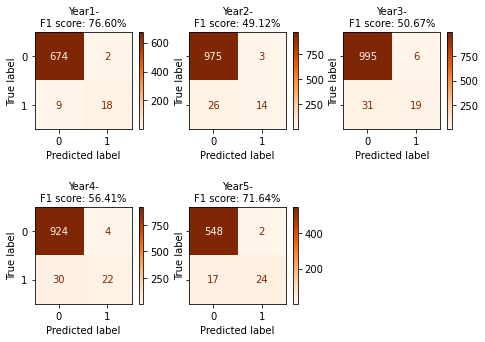

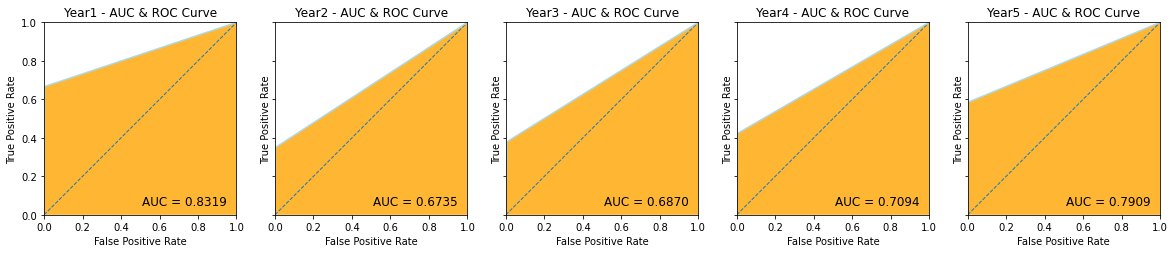

In [11]:
datasets = [data_1, data_2, data_3, data_4, data_5]
n = 1
scaling = "RobustScaler"  # StandardScaler
test_size = .1
i = 0
activation = 'none'
f, axes = plt.subplots(2, 3, figsize=(8, 5), sharey='row')
axes = axes.flatten()
f1, axes1 = plt.subplots(1, 5, figsize=(20, 4), sharey='row')
for df in datasets:
  
  data_name = 'Year' + str(n)
  y_testset, y_predicted = grabit_model(df, scaling_type = scaling, test_size = test_size)
  accuracy, precision, recall, f1, auc = performance_metrics(y_testset, y_predicted)
  
  plot_data['Data_Name'].append(data_name)
  plot_data['Accuracy'].append(accuracy)
  plot_data['Precision'].append(precision)
  plot_data['Recall'].append(recall)
  plot_data['F1_score'].append(f1)
  plot_data['Scale_Type'].append(scaling)
  plot_data['Test_size'].append(test_size)
  plot_data['Model'].append('Grabit') # Change as per model
  plot_data['Activation'].append(activation)
  plot_data['AUC'].append(auc)
  
  plot_roc_curve(y_testset, y_predicted, n, axes1, auc)
  # print(f'Confusion matrix for dataset {data_name}')
  cm = confusion_matrix(y_testset, y_predicted)
  cmd = ConfusionMatrixDisplay(cm)
  cmd.plot(cmap='Oranges', ax=axes[i])
  axes[i].set_title(f'Year{str(n)}-\nF1 score: {f1:.2%}', fontsize = 10)
  axes[5].set_axis_off()
    
  i+=1
  n+=1

#f.tight_layout()
f.subplots_adjust(hspace=.8)
f.subplots_adjust(wspace=0.12)
plt.show()

In [12]:
Performance_numbers = pd.DataFrame(plot_data)

In [13]:
Performance_numbers

,Data_Name,Accuracy,Precision,Recall,F1_score,Scale_Type,AUC,Test_size,Model,Activation
0,Year1,0.984353,0.900000,0.666667,0.765957,RobustScaler,0.831854,0.1,Grabit,none
1,Year2,0.971513,0.823529,0.350000,0.491228,RobustScaler,0.673466,0.1,Grabit,none
2,Year3,0.964795,0.760000,0.380000,0.506667,RobustScaler,0.687003,0.1,Grabit,none
3,Year4,0.965306,0.846154,0.423077,0.564103,RobustScaler,0.709383,0.1,Grabit,none
4,Year5,0.967851,0.923077,0.585366,0.716418,RobustScaler,0.790865,0.1,Grabit,none


In [14]:
# Change Filename as per model
Performance_numbers.to_excel(os.path.join(path, 'Gabit_Results.xlsx')) 